# BH-PCMLAI Practical Assignment 03 - DanTrezise

## Overview:
    Compare the performance of the classifiers 
        k-nearest neighbors 
        logistic regression 
        decision trees  
        support vector machines 

## business problem:
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.
- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

https://archive.ics.uci.edu/dataset/222/bank+marketing

## Libraries

In [1]:
# Import all necessary libraries
# python base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

# visualization tools
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# models
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline

# model tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

## data

In [2]:
# pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 


### Data Overview

In [4]:
# Overview of columns

X.columns, X.shape

(Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'),
 (45211, 16))

In [5]:
X.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [6]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [8]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

### Data Clean Up

In [9]:
# dropping columns with null values - none look to have significant relevance to the buisness problem
X.dropna(axis=1, inplace=True)
X.isnull().sum()

age            0
marital        0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
dtype: int64

In [10]:
X

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,married,no,2143,yes,no,5,may,261,1,-1,0
1,44,single,no,29,yes,no,5,may,151,1,-1,0
2,33,married,no,2,yes,yes,5,may,76,1,-1,0
3,47,married,no,1506,yes,no,5,may,92,1,-1,0
4,33,single,no,1,no,no,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,no,825,no,no,17,nov,977,3,-1,0
45207,71,divorced,no,1729,no,no,17,nov,456,2,-1,0
45208,72,married,no,5715,no,no,17,nov,1127,5,184,3
45209,57,married,no,668,no,no,17,nov,508,4,-1,0


#### Replacing X "yes" and "no" values with "1" and "0"

In [11]:
X_replace = X.replace({'default': {'yes': '1', 'no': '0'}})

In [12]:
X_replace = X_replace.replace({'housing': {'yes': '1', 'no': '0'}})

In [13]:
X_replace = X_replace.replace({'loan': {'yes': '1', 'no': '0'}})

In [14]:
X = X_replace
X

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,married,0,2143,1,0,5,may,261,1,-1,0
1,44,single,0,29,1,0,5,may,151,1,-1,0
2,33,married,0,2,1,1,5,may,76,1,-1,0
3,47,married,0,1506,1,0,5,may,92,1,-1,0
4,33,single,0,1,0,0,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,0,825,0,0,17,nov,977,3,-1,0
45207,71,divorced,0,1729,0,0,17,nov,456,2,-1,0
45208,72,married,0,5715,0,0,17,nov,1127,5,184,3
45209,57,married,0,668,0,0,17,nov,508,4,-1,0


#### Replacing y "yes" and "no" values with "1" and "0"

In [15]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [16]:
y = y.replace({'y': {'yes': '1', 'no': '0'}})
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   marital      45211 non-null  object
 2   default      45211 non-null  object
 3   balance      45211 non-null  int64 
 4   housing      45211 non-null  object
 5   loan         45211 non-null  object
 6   day_of_week  45211 non-null  int64 
 7   month        45211 non-null  object
 8   duration     45211 non-null  int64 
 9   campaign     45211 non-null  int64 
 10  pdays        45211 non-null  int64 
 11  previous     45211 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.1+ MB


### Converting data types: objects to int64

In [18]:
X_objs = ['default', 'housing', 'loan']
X[X_objs] = X[X_objs].apply(pd.to_numeric, errors='coerce')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   marital      45211 non-null  object
 2   default      45211 non-null  int64 
 3   balance      45211 non-null  int64 
 4   housing      45211 non-null  int64 
 5   loan         45211 non-null  int64 
 6   day_of_week  45211 non-null  int64 
 7   month        45211 non-null  object
 8   duration     45211 non-null  int64 
 9   campaign     45211 non-null  int64 
 10  pdays        45211 non-null  int64 
 11  previous     45211 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 4.1+ MB


In [19]:
y[['y']] = y[['y']].apply(pd.to_numeric, errors='coerce')

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


### Visualizatons

<Axes: >

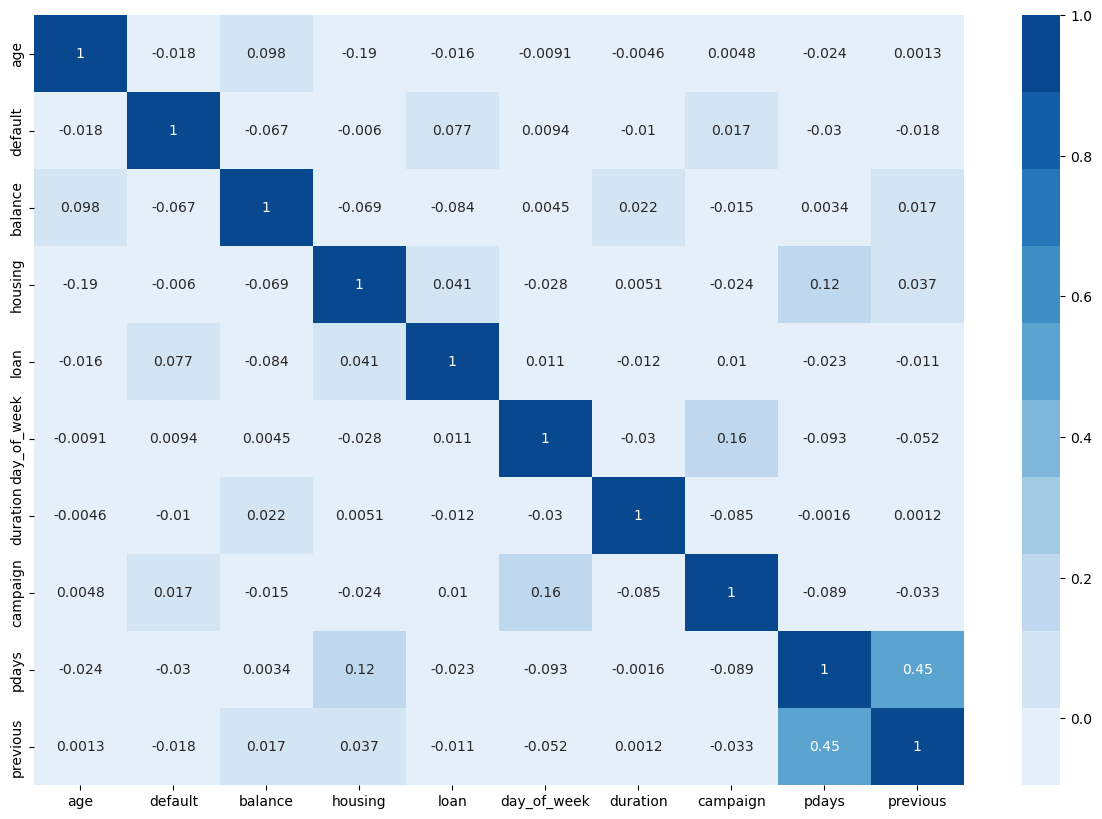

In [20]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = X.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/X_corr_heatmap.png')

In [21]:
X.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan',
       'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

### Scaling Features

In [22]:
#  feature selection for scaling:


scaled_features = ['balance', 'duration', 'campaign', 'pdays']
X_unscaled = ['age', 'marital', 'default', 'housing', 'loan', 'day_of_week', 'month', 'previous']


In [23]:
# Scale features through various scalers:
# Review current scale of data

X[scaled_features].head()

,balance,duration,campaign,pdays
0,2143,261,1,-1
1,29,151,1,-1
2,2,76,1,-1
3,1506,92,1,-1
4,1,198,1,-1


In [24]:
#StandardScaler
stnd_sclr = StandardScaler().fit_transform(X[scaled_features])
stnd_X = pd.DataFrame(stnd_sclr, columns=[scaled_features])

# confirm scaling worked
stnd_X.head()

,balance,duration,campaign,pdays
0,0.256419,0.011016,-0.569351,-0.411453
1,-0.437895,-0.416127,-0.569351,-0.411453
2,-0.446762,-0.707361,-0.569351,-0.411453
3,0.047205,-0.645231,-0.569351,-0.411453
4,-0.447091,-0.233620,-0.569351,-0.411453


In [25]:
# MinMaxScaler
minmax_sclr = MinMaxScaler().fit_transform(X[scaled_features])
minmax_X = pd.DataFrame(minmax_sclr, columns=[scaled_features])

# confirm scaling worked
minmax_X.head()

,balance,duration,campaign,pdays
0,0.092259,0.053070,0.0,0.0
1,0.073067,0.030704,0.0,0.0
2,0.072822,0.015453,0.0,0.0
3,0.086476,0.018707,0.0,0.0
4,0.072812,0.040260,0.0,0.0


In [26]:
# RobustScaler
robust_sclr = RobustScaler().fit_transform(X[scaled_features])
robust_X = pd.DataFrame(robust_sclr, columns=[scaled_features])

# confirm scaling worked
robust_X.head()

,balance,duration,campaign,pdays
0,1.250000,0.375000,-0.5,0.0
1,-0.308997,-0.134259,-0.5,0.0
2,-0.328909,-0.481481,-0.5,0.0
3,0.780236,-0.407407,-0.5,0.0
4,-0.329646,0.083333,-0.5,0.0


In [27]:
# Normalizer
norm_sclr = Normalizer().fit_transform(X[scaled_features])
norm_X = pd.DataFrame(norm_sclr, columns=[scaled_features])

# confirm scaling worked
norm_X.head()

,balance,duration,campaign,pdays
0,0.992665,0.120898,0.000463,-0.000463
1,0.188598,0.982011,0.006503,-0.006503
2,0.026302,0.999481,0.013151,-0.013151
3,0.998139,0.060975,0.000663,-0.000663
4,0.005050,0.999962,0.005050,-0.005050


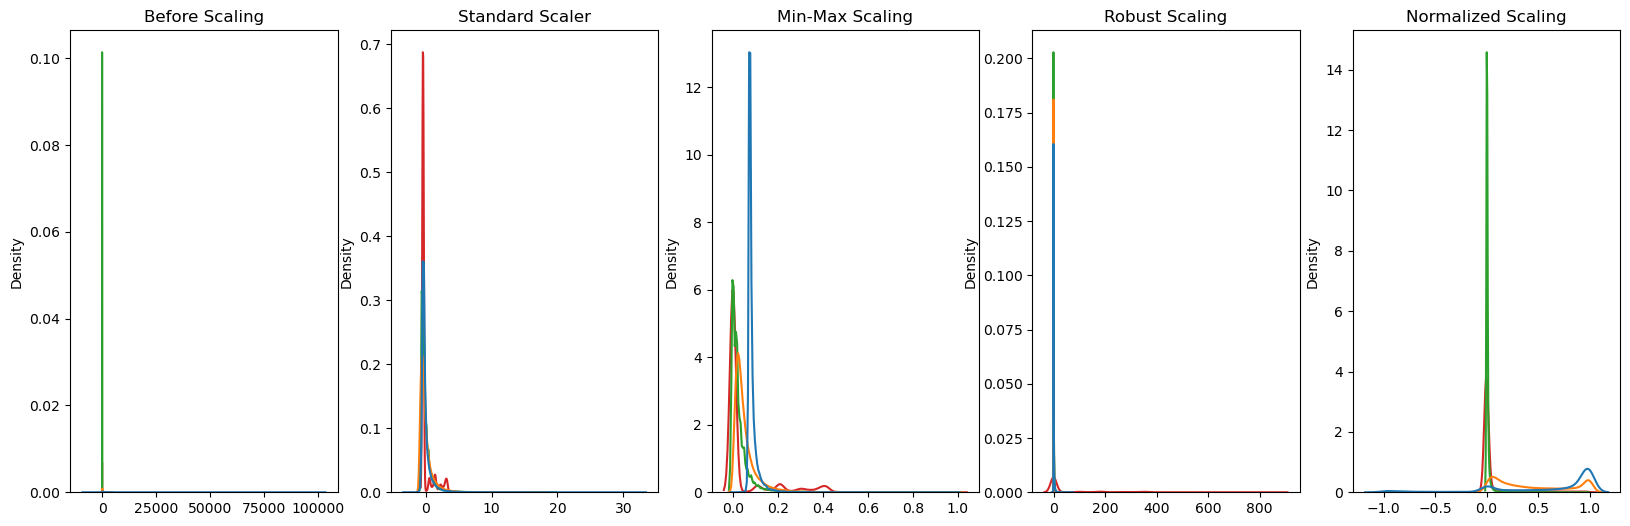

In [28]:
# Visualization of various scaling techniques on entire dataset

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(data=X[scaled_features], ax=ax1)
ax1.get_legend().set_visible(False)

ax2.set_title('Standard Scaler')
sns.kdeplot(data=stnd_X, ax=ax2)
ax2.get_legend().set_visible(False)

ax3.set_title('Min-Max Scaling')
sns.kdeplot(data=minmax_X, ax=ax3)
ax3.get_legend().set_visible(False)

ax4.set_title('Robust Scaling')
sns.kdeplot(data=robust_X, ax=ax4)
ax4.get_legend().set_visible(False)

ax5.set_title('Normalized Scaling')
sns.kdeplot(data=norm_X, ax=ax5)
ax5.get_legend().set_visible(False)

plt.show()
# fig.savefig('../plots/ScalingPlots.png')

In [29]:
# Examine the correlation of chosen scaled features with the original target

scl_choice = robust_X

X_scl_corr = scl_choice.corrwith(y['y'], axis=0, drop=False, method='pearson', numeric_only=False)
X_scl_corr

# Using the list below to select the best features to include in the model

balance     0.052838
duration    0.394521
campaign   -0.073172
pdays       0.103621
dtype: float64

<Axes: xlabel='None', ylabel='None'>

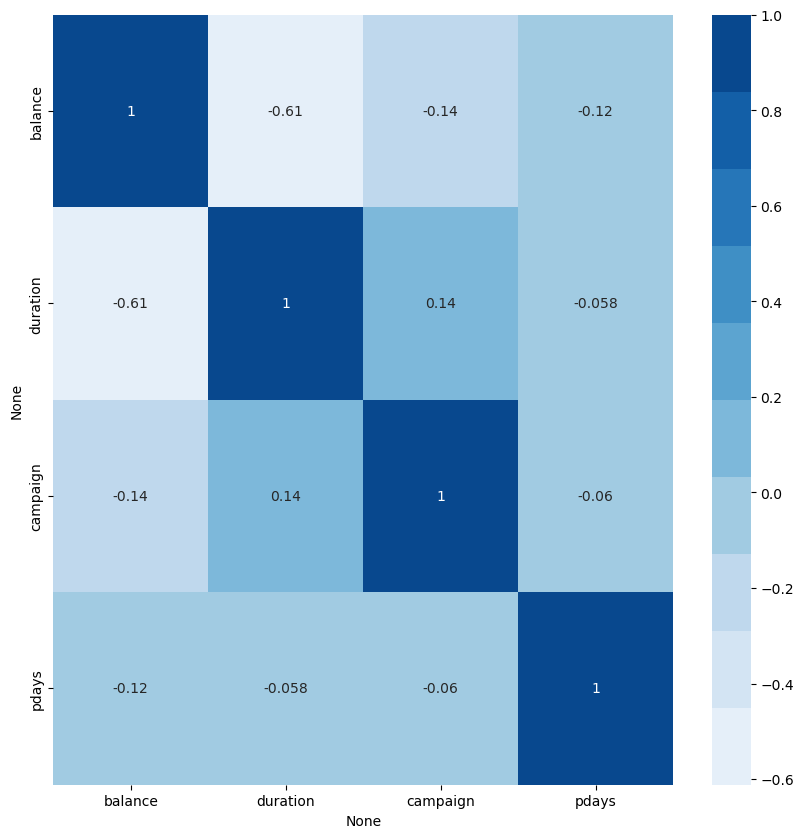

In [30]:
correlation = norm_X.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/X_scaled_heatmap.png')

## MODELING:

### Setup

In [31]:
X

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,married,0,2143,1,0,5,may,261,1,-1,0
1,44,single,0,29,1,0,5,may,151,1,-1,0
2,33,married,0,2,1,1,5,may,76,1,-1,0
3,47,married,0,1506,1,0,5,may,92,1,-1,0
4,33,single,0,1,0,0,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,0,825,0,0,17,nov,977,3,-1,0
45207,71,divorced,0,1729,0,0,17,nov,456,2,-1,0
45208,72,married,0,5715,0,0,17,nov,1127,5,184,3
45209,57,married,0,668,0,0,17,nov,508,4,-1,0


In [32]:
norm_X

,balance,duration,campaign,pdays
0,0.992665,0.120898,0.000463,-0.000463
1,0.188598,0.982011,0.006503,-0.006503
2,0.026302,0.999481,0.013151,-0.013151
3,0.998139,0.060975,0.000663,-0.000663
4,0.005050,0.999962,0.005050,-0.005050
...,...,...,...,...
45206,0.645169,0.764036,0.002346,-0.000782
45207,0.966936,0.255016,0.001118,-0.000559
45208,0.980616,0.193378,0.000858,0.031572
45209,0.795969,0.605318,0.004766,-0.001192


In [33]:
# Choose which variety of scaling to merge back in with the rest of the X dataset:

# scl_choice = stnd_X
# scl_choice = robust_X
# scl_choice = minmax_X
scl_choice = norm_X

# Merge X with chosen scaled data or not

X = X[X_unscaled]
X = X.merge(scl_choice, how='outer',  left_index=True, right_index=True)
# X.info()

In [34]:
X.columns

Index([        'age',     'marital',     'default',     'housing',
              'loan', 'day_of_week',       'month',    'previous',
        ('balance',), ('duration',), ('campaign',),    ('pdays',)],
      dtype='object')

In [35]:
# Rename columns & confirm...

old_names = ['age','marital','default','housing',
             'loan', 'day_of_week','month','previous',
             ('balance',), ('duration',),
             ('campaign',),('pdays',)]

new_names = ['age', 'marital', 'default', 'balance', 'housing', 'loan',
       'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous']

X.rename(columns=dict(zip(old_names, new_names)), inplace=True)
X.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan',
       'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [36]:
X

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,married,0,1,0,5,may,0,0.992665,0.120898,0.000463,-0.000463
1,44,single,0,1,0,5,may,0,0.188598,0.982011,0.006503,-0.006503
2,33,married,0,1,1,5,may,0,0.026302,0.999481,0.013151,-0.013151
3,47,married,0,1,0,5,may,0,0.998139,0.060975,0.000663,-0.000663
4,33,single,0,0,0,5,may,0,0.005050,0.999962,0.005050,-0.005050
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,0,0,0,17,nov,0,0.645169,0.764036,0.002346,-0.000782
45207,71,divorced,0,0,0,17,nov,0,0.966936,0.255016,0.001118,-0.000559
45208,72,married,0,0,0,17,nov,3,0.980616,0.193378,0.000858,0.031572
45209,57,married,0,0,0,17,nov,0,0.795969,0.605318,0.004766,-0.001192


In [37]:
# Assiging X_features to propagate through the following models

X_features = ['age', 'default', 'balance', 'housing', 'loan',
            'month', 'duration', 'campaign', 'pdays', 'previous']

X = X[X_features]
# X = X[scaled_features]


In [38]:
X

,age,default,balance,housing,loan,month,duration,campaign,pdays,previous
0,58,0,1,0,5,0,0.992665,0.120898,0.000463,-0.000463
1,44,0,1,0,5,0,0.188598,0.982011,0.006503,-0.006503
2,33,0,1,1,5,0,0.026302,0.999481,0.013151,-0.013151
3,47,0,1,0,5,0,0.998139,0.060975,0.000663,-0.000663
4,33,0,0,0,5,0,0.005050,0.999962,0.005050,-0.005050
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,17,0,0.645169,0.764036,0.002346,-0.000782
45207,71,0,0,0,17,0,0.966936,0.255016,0.001118,-0.000559
45208,72,0,0,0,17,3,0.980616,0.193378,0.000858,0.031572
45209,57,0,0,0,17,0,0.795969,0.605318,0.004766,-0.001192


In [39]:
y.info

<bound method DataFrame.info of        y
0      0
1      0
2      0
3      0
4      0
...   ..
45206  1
45207  1
45208  1
45209  0
45210  0

[45211 rows x 1 columns]>

### Train Test Split

In [40]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((31647, 10), (13564, 10), (31647, 1), (13564, 1))

## MODELS:

In [41]:
def make_plot(estimator):
    X1 = X_train
    y = y_train
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')

### (1) Logistic Regression Classification

In [42]:
# Logistic Regression Model

# logreg = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
logreg = LogisticRegression(penalty='l2', max_iter=500, multi_class='multinomial')
logreg.fit(X_train, y_train)


# make_plot(logreg)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [43]:
# MODEL METRICS

# Predictions
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = logreg.score(X_train, y_train)
intercept = logreg.intercept_
coef = logreg.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)

Model Metrics: 

Train MSE = [0.11776787689196448]     Test MSE = [0.11795930404010617]      MAE = 0.11795930404010617
RMSE = 0.3434520403784292      RMSLE = -1.0687077975088284
Score = 0.8822321231080356       R2 Score = -0.141192107210806 



In [44]:
quad_logreg_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('scale', StandardScaler()),
                 ('logreg', LogisticRegression(multi_class='multinomial'))]).fit(X_train, y_train)

# make_plot(quad_logreg_pipe)
quad_logreg_pipe

Pipeline(steps=[('poly', PolynomialFeatures()), ('scale', StandardScaler()),
                ('logreg', LogisticRegression(multi_class='multinomial'))])

In [45]:
# MODEL METRICS

# Predictions
train_pred = quad_logreg_pipe.predict(X_train)
test_pred = quad_logreg_pipe.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = quad_logreg_pipe.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 

Model Metrics: 

Train MSE = [0.11179574683224318]     Test MSE = [0.11287230905337658]      MAE = 0.11287230905337658
RMSE = 0.3359647437654383      RMSLE = -1.0907490537939226
Score = 0.8882042531677569       R2 Score = -0.08332108272386152 



In [46]:
poly5_logreg_pipe = Pipeline([('poly', PolynomialFeatures(degree=5)),
                 ('scale', StandardScaler()),
                 ('logreg', LogisticRegression(multi_class='multinomial'))]).fit(X_train, y_train)

# make_plot(quad_logreg_pipe)
poly5_logreg_pipe

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scale', StandardScaler()),
                ('logreg', LogisticRegression(multi_class='multinomial'))])

In [47]:
# MODEL METRICS

# Predictions
train_pred = poly5_logreg_pipe.predict(X_train)
test_pred = poly5_logreg_pipe.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = poly5_logreg_pipe.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 

Model Metrics: 

Train MSE = [0.10692956678358138]     Test MSE = [0.11419935122382778]      MAE = 0.11419935122382778
RMSE = 0.3379339450600188      RMSLE = -1.0849048314143301
Score = 0.8930704332164187       R2 Score = -0.03616691462338828 



In [48]:
# # Uncomment to visualize the decision boundary for quad_pipe
# labels = pd.factorize(quad_pipe.predict(grid))[0]

# plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
# sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

In [49]:
# # Uncomment to visualize the decision boundary for lgr
# X1 = X_train
# y = y_train

# xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
# yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
# XX, YY = np.meshgrid(xx, yy)
# grid = np.c_[XX.ravel(), YY.ravel()]
# labels = pd.factorize(logreg.predict(grid))[0]

# plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
# sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

### (2) Decision Tree

In [76]:
# Decision Tree Model

dt_model = DecisionTreeClassifier(random_state=0, max_depth=20).fit(X_train, y_train)

# make_plot(dt_model)

In [77]:
# tree_text = tree.export_text(dt_model)
# print(tree_text)

In [78]:
# fig = plt.figure(figsize=(25,40))
# _ = tree.plot_tree(dt_model,
#                    filled=True)

In [79]:
# MODEL METRICS

# Predictions
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = dt_model.score(X_train, y_train)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 

# print('Train Accuracy Score =', train_accuracy, '   Test Accuracy Score =', test_accuracy)



Model Metrics: 

Train MSE = [0.007804847220905615]     Test MSE = [0.14295193158360367]      MAE = 0.14295193158360367
RMSE = 0.3780898459144383      RMSLE = -0.9726234240014386
Score = 0.9921951527790944       R2 Score = 0.9243696135011888 



In [54]:
# print('Train Confusion Matrix:')
# confusion_matrix(y_train, train_pred)


In [55]:
# cm = confusion_matrix(y_train, train_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot();

In [56]:
# print('Test Confusion Matrix:')
# confusion_matrix(y_test, test_pred)

In [57]:
# cm = confusion_matrix(y_test, test_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot();

In [58]:
# print ('Train Classification Report \n', classification_report(y_train, train_pred))

In [59]:
# print ('Test Classification Report \n', classification_report(y_test, test_pred))

### (3) K-nearest Neighbors (KNN)

In [60]:
# KNN Model (n_neighbors=3)

KNN2_model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

# make_plot(KNN2_model)

In [61]:
# KNN Model (n_neighbors=6)

KNN3_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# make_plot(KNN3_model)

In [62]:
# MODEL METRICS

# Predictions

KNN2_train_pred = KNN2_model.predict(X_train)
KNN2_test_pred = KNN2_model.predict(X_test)

KNN3_train_pred = KNN3_model.predict(X_train)
KNN3_test_pred = KNN3_model.predict(X_test)

# Calculate MSES
KNN2_train_mses = []
KNN2_test_mses = []
KNN2_train_mses.append(mean_squared_error(y_train, KNN2_train_pred))
KNN2_test_mses.append(mean_squared_error(y_test, KNN2_test_pred))

KNN3_train_mses = []
KNN3_test_mses = []
KNN3_train_mses.append(mean_squared_error(y_train, KNN3_train_pred))
KNN3_test_mses.append(mean_squared_error(y_test, KNN3_test_pred))

#Calculate other metrics
KNN2_mae = mean_absolute_error(y_test, KNN2_test_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_test_pred))
KNN2_rmsle = np.log(np.sqrt(mean_squared_error(y_test, KNN2_test_pred)))
KNN2_r2 = r2_score(y_train, KNN2_train_pred)
KNN2_score = KNN2_model.score(X_train, y_train)

KNN3_mae = mean_absolute_error(y_test, KNN3_test_pred)
KNN3_rmse = np.sqrt(mean_squared_error(y_test, KNN3_test_pred))
KNN3_rmsle = np.log(np.sqrt(mean_squared_error(y_test, KNN3_test_pred)))
KNN3_r2 = r2_score(y_train, KNN3_train_pred)
KNN3_score = KNN3_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('KNN Model 2 Neighbors:', '\n')
print('KNN 2 Train MSE =', KNN2_train_mses, '    KNN 2 Test MSE =', KNN2_test_mses, '     KNN 2 MAE =', KNN2_mae)
print("KNN 2 RMSE =", KNN2_rmse, '     KNN 2 RMSLE =', KNN2_rmsle)
print('KNN 2 Score =', KNN2_score, '      KNN 2 R2 Score =', KNN2_r2, '\n') 
print('KNN Model 3 Neighbors:', '\n')
print('KNN 3 Train MSE =', KNN3_train_mses, '    KNN 3 Test MSE =', KNN3_test_mses, '     KNN 3 MAE =', KNN3_mae)
print("KNN 3 RMSE =", KNN3_rmse, '     KNN 3 RMSLE =', KNN3_rmsle)
print('KNN 3 Score =', KNN3_score, '      KNN 3 R2 Score =', KNN3_r2, '\n') 



Model Metrics: 

KNN Model 2 Neighbors: 

KNN 2 Train MSE = [0.08967674661105318]     KNN 2 Test MSE = [0.12400471837216161]      KNN 2 MAE = 0.12400471837216161
KNN 2 RMSE = 0.3521430368077177      KNN 2 RMSLE = -1.0437178313563178
KNN 2 Score = 0.9103232533889468       KNN 2 R2 Score = 0.13101604500556274 

KNN Model 3 Neighbors: 

KNN 3 Train MSE = [0.08929756375011849]     KNN 3 Test MSE = [0.1375700383367738]      KNN 3 MAE = 0.1375700383367738
KNN 3 RMSE = 0.37090435200570754      KNN 3 RMSLE = -0.9918110609191201
KNN 3 Score = 0.9107024362498815       KNN 3 R2 Score = 0.13469039576663855 



### (4) Support Vector Machine (SVM)

In [63]:
# SVM Model

SVM_model = LinearSVC(max_iter=3000, random_state=42, C=.5).fit(X_train, y_train)

# make_plot(SVM_model)

In [64]:
# MODEL METRICS

# Predictions
train_pred = SVM_model.predict(X_train)
test_pred = SVM_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = SVM_model.score(X_train, y_train)
intercept = SVM_model.intercept_
coef = SVM_model.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae, '\n')
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)


Model Metrics: 

Train MSE = [0.15950959016652447]     Test MSE = [0.15998230610439398]      MAE = 0.15998230610439398 

RMSE = 0.39997788201898615      RMSLE = -0.9163460283555119
Score = 0.8404904098334756       R2 Score = -0.5456768868259052 

